# Imports

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns

# Visualization and Organization of the Data Set

In [6]:
train_df = pd.read_csv("../datasets/news_headlines.csv")
train_df

,post,tags
0,após quentinhas e alimentação cortada vasco ac...,esporte
1,até os <digit><digit> dá para sonhar diz idoso...,educacao
2,brigadeiro da aprovação oração mãe e filha jun...,educacao
3,estou preparada diz filha de professora e cand...,educacao
4,hamburgada do bem feita por professora do rj f...,educacao
...,...,...
11764,zidane reconhece fracasso e admite cargo ameaç...,esporte
11765,zidane se inspira em início no real para afast...,esporte
11766,zidane vê como natural substituição de cr<digi...,esporte
11767,zizi lança gravação de música inédita da trilh...,musica


## Separate view by classes

Class are already balanced, this is good for the classifier. Unbalanced classes promote a certain bias for these classes.

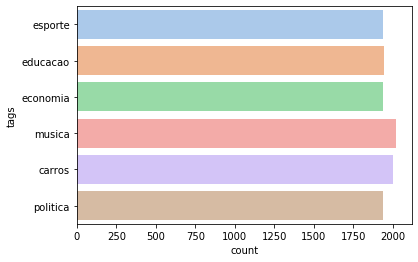

In [41]:
sns.countplot(y="tags", data=train_df,palette='pastel')

## Transformation of text tags to label

In [11]:
le = LabelEncoder()
Y = le.fit_transform(train_df['tags'])
print(Y)
print(le.classes_)

[3 2 2 ... 3 4 3]
['carros' 'economia' 'educacao' 'esporte' 'musica' 'politica']


# Pipeline training and creation

In [47]:
X_train, X_test, y_train, y_test = train_test_split(train_df['post'], Y, test_size = 0.2,random_state=5 )

In [48]:
pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('clf',LinearSVC())
])
pipeline.steps

[('vectorizer',
  TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.float64'>, encoding='utf-8',
                  input='content', lowercase=True, max_df=1.0, max_features=None,
                  min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                  smooth_idf=True, stop_words=None, strip_accents=None,
                  sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, use_idf=True, vocabulary=None)),
 ('clf',
  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_iter=1000,
            multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
            verbose=0))]

In [49]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
          

# Metrics prediction and application

In [50]:
pred = pipeline.predict(X_test)
pred

array([2, 2, 1, ..., 5, 1, 5])

In [51]:
accuracy_score(y_test,pred)

0.9103653355989805

In [52]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       389
           1       0.81      0.80      0.80       396
           2       0.95      0.93      0.94       403
           3       0.94      0.94      0.94       393
           4       0.95      0.96      0.95       413
           5       0.87      0.88      0.87       360

    accuracy                           0.91      2354
   macro avg       0.91      0.91      0.91      2354
weighted avg       0.91      0.91      0.91      2354



# Manual Test

In [53]:
text = 'Palmeiras marca um gol no final da partida'
prediction = pipeline.predict([text])
le.inverse_transform(prediction)[0]

'esporte'

In [39]:
text = 'Airton Senna ganhou mais um trofeu'
prediction = pipeline.predict([text])
le.inverse_transform(prediction)[0]

'carros'

# Export model for production

In [55]:
joblib.dump(pipeline,"../model/model.joblib")

['../model/classifier.joblib']